In [19]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import datetime as dt
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import tree
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
import plotly
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.api import Holt
import cufflinks as cf
from plotly.offline import init_notebook_mode,plot,iplot
import folium
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import ShuffleSplit


from scipy.fft import fft, ifft
from scipy import signal as sig
import math

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import warnings
warnings.simplefilter('ignore')

In [20]:
data = pd.read_csv("covid.csv")
df = data.drop(['Country_code'], axis=1)
df['Total_cases'] = df['Cumulative_cases'] + df['New_cases']
df['Active_cases'] = df['Total_cases'] - (df['New_cases'] + df['New_deaths'])
df["Date_reported"] = pd.to_datetime(df["Date_reported"])
df['timestamp_trunc'] = df['Date_reported'].dt.floor('D')
df["Date_reported"] = df["Date_reported"].map(dt.datetime.toordinal)
df = df[df["Country"]=="Afghanistan"]
df.tail(10).style.background_gradient(cmap="Reds")

,Date_reported,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Total_cases,Active_cases,timestamp_trunc
1397,738824,Afghanistan,EMRO,50,227644,0,7953,227694,227644,2023-10-31 00:00:00
1398,738825,Afghanistan,EMRO,55,227699,2,7955,227754,227697,2023-11-01 00:00:00
1399,738826,Afghanistan,EMRO,64,227763,1,7956,227827,227762,2023-11-02 00:00:00
1400,738827,Afghanistan,EMRO,49,227812,0,7956,227861,227812,2023-11-03 00:00:00
1401,738828,Afghanistan,EMRO,69,227881,0,7956,227950,227881,2023-11-04 00:00:00
1402,738829,Afghanistan,EMRO,4,227885,0,7956,227889,227885,2023-11-05 00:00:00
1403,738830,Afghanistan,EMRO,0,227885,0,7956,227885,227885,2023-11-06 00:00:00
1404,738831,Afghanistan,EMRO,0,227885,0,7956,227885,227885,2023-11-07 00:00:00
1405,738832,Afghanistan,EMRO,0,227885,0,7956,227885,227885,2023-11-08 00:00:00
1406,738833,Afghanistan,EMRO,0,227885,0,7956,227885,227885,2023-11-09 00:00:00


In [21]:
Total_Active_Cases = df.groupby("Country")['Active_cases'].sum().sort_values(ascending=False).to_frame()
Total_Active_Cases.style.background_gradient(cmap="Reds")

,Active_cases
Country,
Afghanistan,184102500


In [22]:
X = np.array(df[['Date_reported']])
y = np.array(df[['Active_cases']])

X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=df['Country'] )

print ("\n\n ----------------- X train & test shape -----------------")
print(X_train.shape , X_test.shape)
print ("\n\n ----------------- Y train & test shape -----------------")
print(X_train.shape , X_test.shape)



 ----------------- X train & test shape -----------------
(1195, 1) (212, 1)


 ----------------- Y train & test shape -----------------
(1195, 1) (212, 1)


In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:

lr_model_time_domain_model = LinearRegression()
lr_model_time_domain_model.fit(X_train,  y_train.ravel())
lr_model_time_domain_scores = cross_val_score(lr_model_time_domain_model, X_train, y_train.ravel() , scoring="r2")
lr_model_time_domain_predict = cross_val_predict(lr_model_time_domain_model , X_test, y_test.ravel())
lr_model_time_domain_score_test = cross_val_score(lr_model_time_domain_model , X_test , y_test.ravel(), scoring="r2")

print ("\n\n ----------------- Random Forest Classifier -----------------")
print ('##############################################################\n')
print(f'Train Accuracy -  {np.mean(lr_model_time_domain_scores)}')
print(f'Test Accuracy -  {np.mean(lr_model_time_domain_score_test)}')
print ('##############################################################\n')




 ----------------- Random Forest Classifier -----------------
##############################################################

Train Accuracy -  0.9367003011213404
Test Accuracy -  0.9281838304298183
##############################################################



In [25]:


# Use the real and imaginary parts of the FFT as features for linear regression
lr_X_fft_train = np.column_stack((fft(X_train) .real, fft(X_train) .imag))
lr_y_fft_train = np.column_stack((fft(y_train) .real, fft(y_train) .imag))
lr_X_fft_test = np.column_stack((fft(X_test) .real, fft(X_test) .imag))
lr_y_fft_test = np.column_stack((fft(y_test) .real, fft(y_test) .imag))


lr_model_fft = LinearRegression()
lr_model_fft.fit(lr_X_fft_train, lr_y_fft_train)

lr_model_time_fft_scores = cross_val_score(lr_model_fft, lr_X_fft_train, lr_y_fft_train, scoring="r2")
lr_model_time_fft_predict = cross_val_predict(lr_model_fft , lr_X_fft_test, lr_y_fft_test)
lr_model_time_fft_predict = ifft(lr_model_time_fft_predict)
lr_model_time_fft_score_test = cross_val_score(lr_model_fft , lr_X_fft_test , lr_y_fft_test, scoring="r2")

print ("\n\n ----------------- Random Forest Classifier -----------------")
print ('##############################################################\n')
print(f'Train Accuracy -  {np.mean(lr_model_time_fft_scores)}')
print(f'Test Accuracy -  {np.mean(lr_model_time_fft_score_test)}')
print ('##############################################################\n')




 ----------------- Random Forest Classifier -----------------
##############################################################

Train Accuracy -  0.9683501505606701
Test Accuracy -  0.9640919152149092
##############################################################



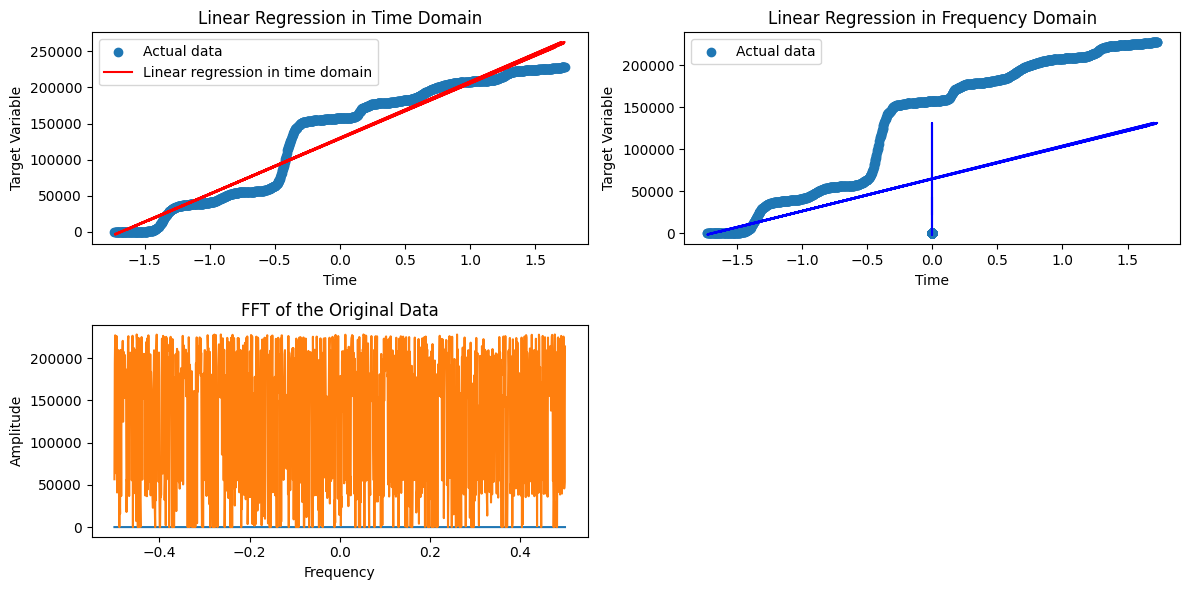

In [26]:
plt.figure(figsize=(12, 6))

# Plot linear regression in time domain
plt.subplot(2, 2, 1)
plt.scatter(X_train, y_train, label='Actual data')
plt.plot(X_test, lr_model_time_domain_predict, color='red', label='Linear regression in time domain')
plt.title('Linear Regression in Time Domain')
plt.xlabel('Time')
plt.ylabel('Target Variable')
plt.legend()

# Plot linear regression in frequency domain
plt.subplot(2, 2, 2)
plt.scatter(lr_X_fft_train, lr_y_fft_train, label='Actual data')
plt.plot(lr_X_fft_test, lr_model_time_fft_predict, color='blue')
plt.title('Linear Regression in Frequency Domain')
plt.xlabel('Time')
plt.ylabel('Target Variable')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(np.fft.fftshift(np.fft.fftfreq(len(X_train))), np.fft.fftshift(np.abs(lr_y_fft_train)))
plt.title('FFT of the Original Data')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()